# Test PDPbox with Regression problem
## Kaggle Rossmann store with RandomForest regressor
This demo is based on **Rossmann Store Sales**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../../')

from pdpbox import pdp, get_dataset

## get dataset

In [3]:
test_ross = get_dataset.ross()
test_ross.keys()

['data', 'features', 'rf_model', 'target']

In [4]:
ross_data = test_ross['data']
ross_features = test_ross['features']
ross_model = test_ross['rf_model']
ross_target = test_ross['target']

## binary feature: SchoolHoliday

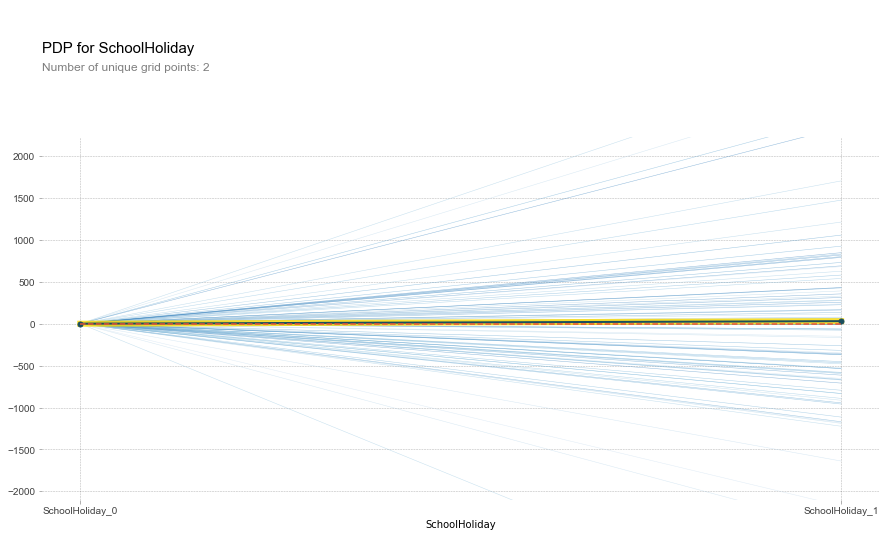

In [5]:
pdp_SchoolHoliday = pdp.pdp_isolate(ross_model, ross_data[ross_features], 'SchoolHoliday')
fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday', plot_lines=True, frac_to_plot=100)

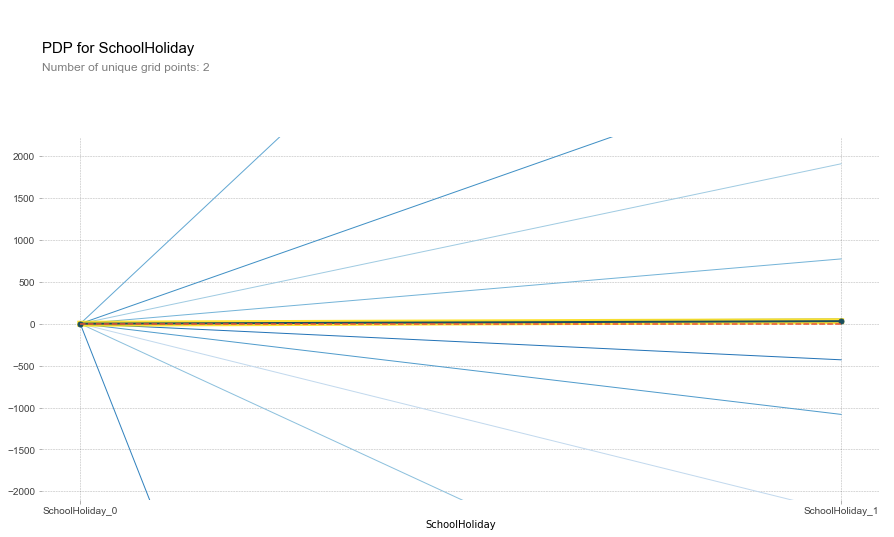

In [6]:
# cluster the individual lines
fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday', plot_lines=True, frac_to_plot=100, cluster=True, 
                         n_cluster_centers=10, cluster_method='accurate')

## onehot encoding feature: StoreType

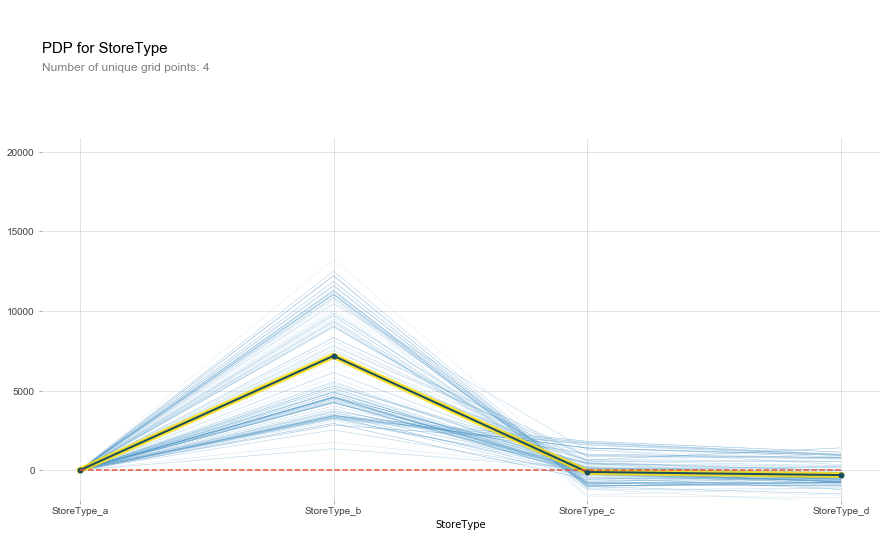

In [7]:
pdp_StoreType = pdp.pdp_isolate(ross_model, ross_data[ross_features], 
                                ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'])
fig, axes = pdp.pdp_plot(pdp_StoreType, 'StoreType', plot_lines=True, frac_to_plot=100)

## numeric feature: weekofyear

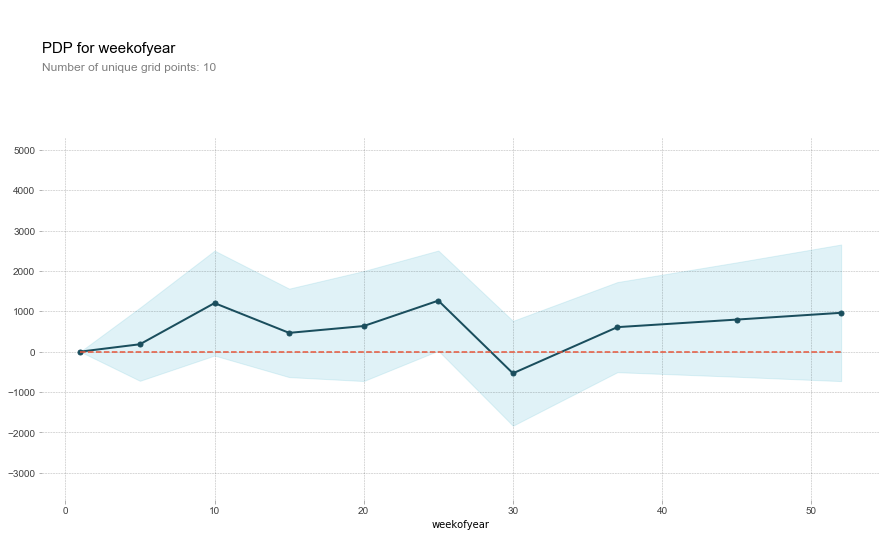

In [9]:
pdp_weekofyear = pdp.pdp_isolate(ross_model, ross_data[ross_features], 'weekofyear', n_jobs=2)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear')

(<matplotlib.figure.Figure at 0x1abd5358>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a87be80>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x234f1a58>})

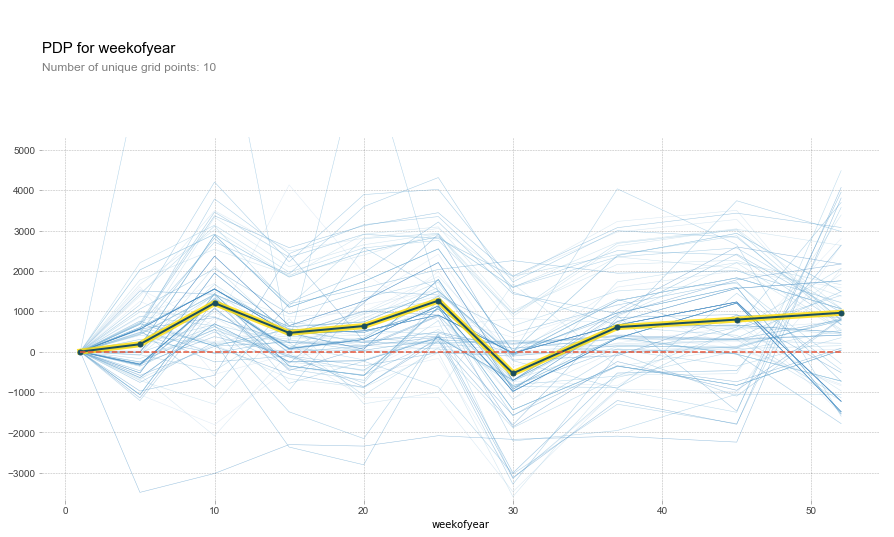

In [10]:
pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100)

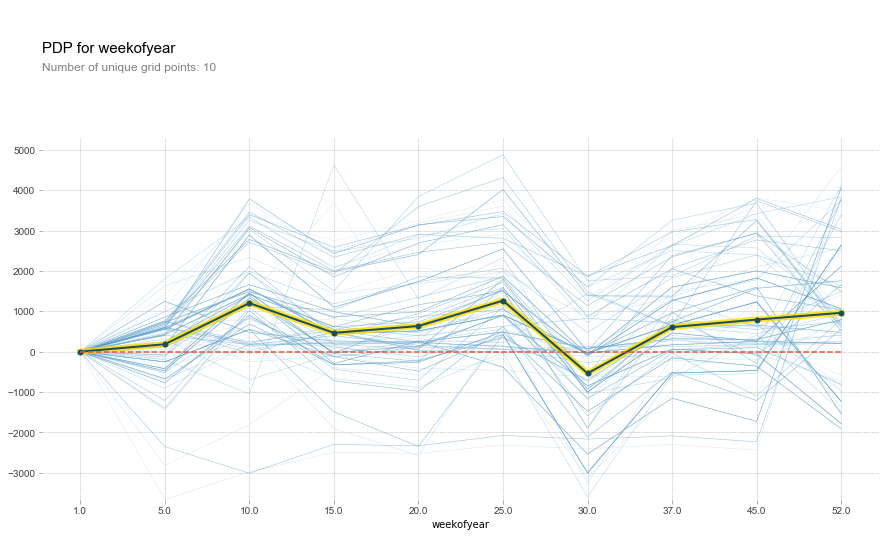

In [12]:
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100, x_quantile=True)

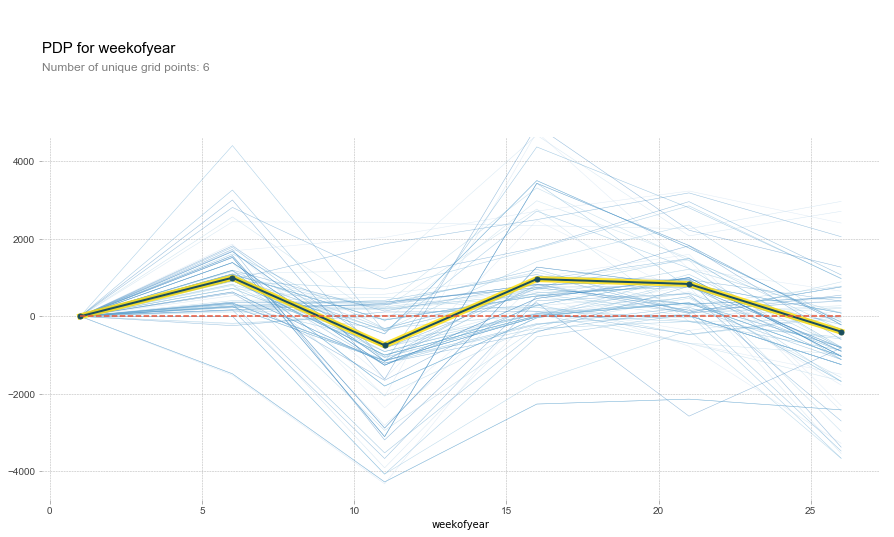

In [14]:
pdp_weekofyear = pdp.pdp_isolate(ross_model, ross_data[ross_features], 'weekofyear', cust_grid_points=range(1, 30, 5))
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100)

## test interaction

In [34]:
inter_rf = pdp.pdp_interact(rf, ross[ross_features], 
                            [['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 'weekofyear'], 
                            num_grid_points=[10, 10])

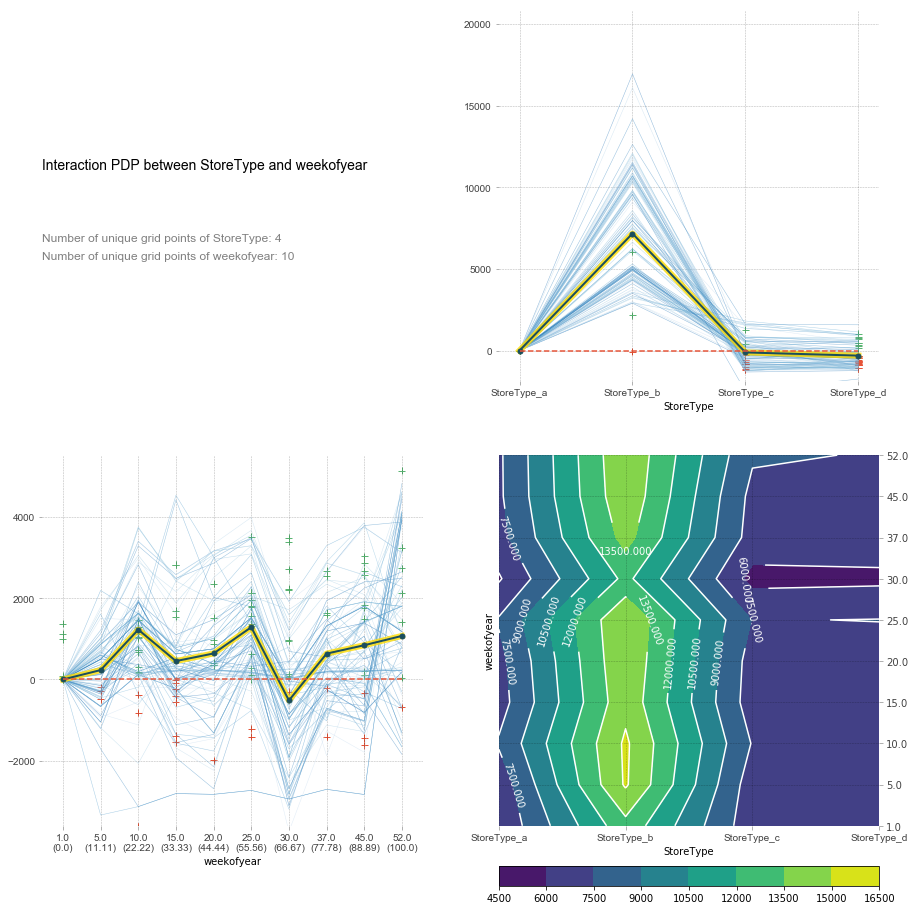

In [35]:
pdp.pdp_interact_plot(inter_rf, ['StoreType', 'weekofyear'], plot_org_pts=True, plot_lines=True, frac_to_plot=100, x_quantile=True)

#### only contours

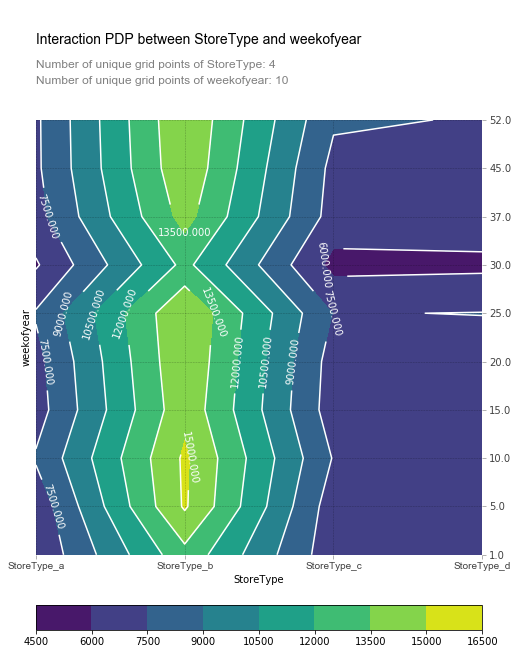

In [36]:
pdp.pdp_interact_plot(inter_rf, ['StoreType', 'weekofyear'], plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=1000, x_quantile=True, only_inter=True)